In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Carregar arquivo para um dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_exames = pd.read_csv('/content/drive/My Drive/TrilhaIA/exame_diabetes.csv')

In [6]:
#Visualizar estrutura

df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [7]:
#Apresentar as 10 primeiras linhas

df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [8]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [9]:
#Remover coluna id_paciente

df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [10]:
#Converter uma variável categórica (genero) em numérica usando One-Hot-Encoding

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

<Axes: >

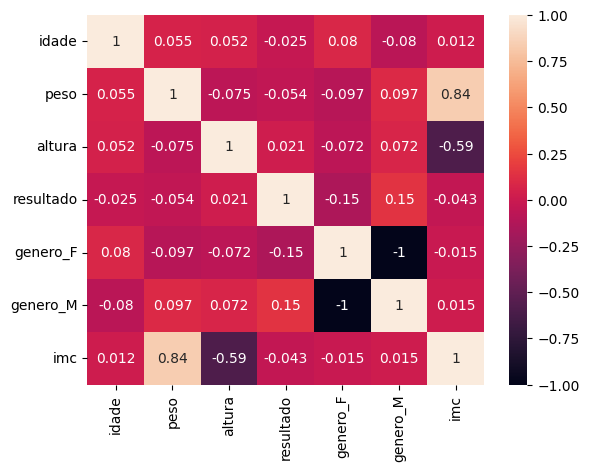

In [22]:
#Apresentar mapa de calor com correlação entre variáveis

sns.heatmap(df_exames.corr(), annot=True)

<Axes: >

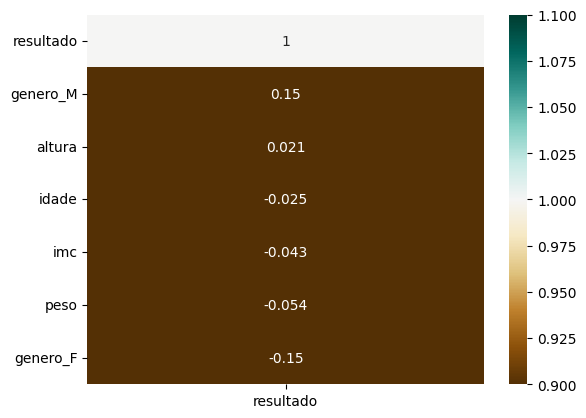

In [23]:
#Mapa de correlação só com variável target

sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

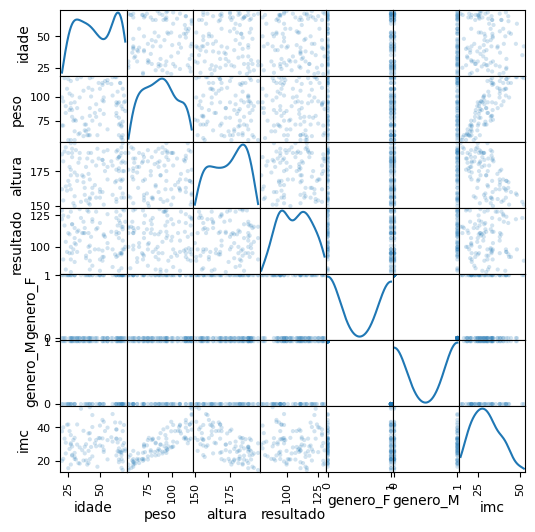

In [24]:
#Plot de Scatter (dispersão) com distribuição

pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')



array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

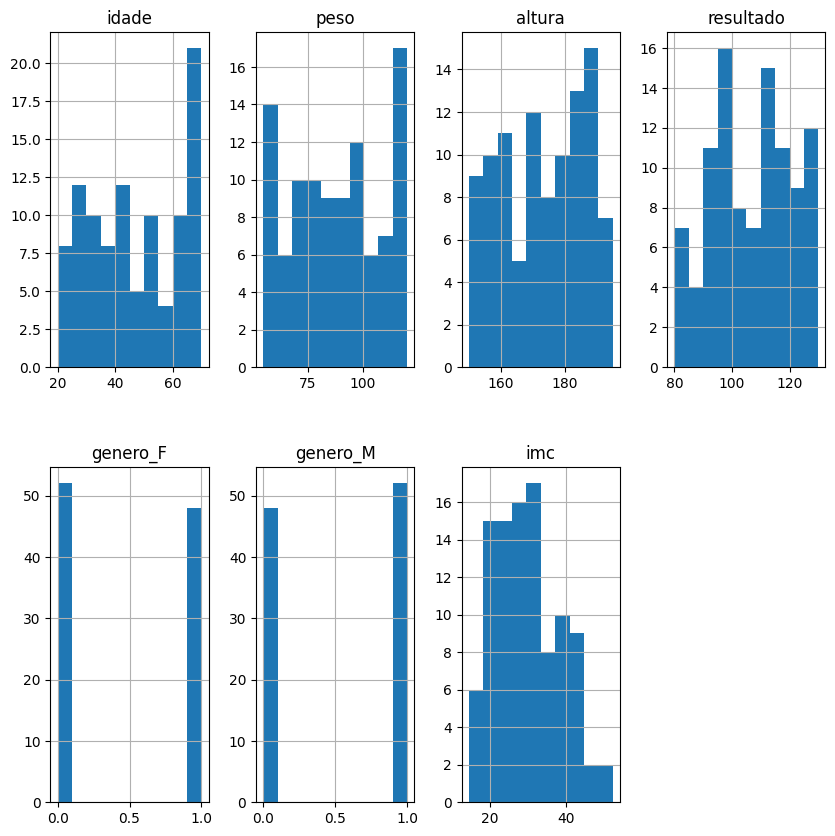

In [28]:
#Histograma de todas as variáveis

df_exames.hist(layout=(2,4), figsize=(10,10))

In [20]:
#Criar uma feature nova

df_exames['imc'] = df_exames['peso'] / ((df_exames['altura']/100)**2)

In [21]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


##Divisão do dataset entre treino e teste - Modelo 1

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
#Modelo 1 - Sem IMC

X = df_exames.drop(columns=['imc', 'resultado'])
Y = df_exames['resultado']

In [34]:
#Dividir conjunto entre treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

##Treinamento do modelo - Modelo 1

In [35]:
#Treinar algoritmo de regressão linear - Modelo 1

model_1 = LinearRegression().fit(X_train, Y_train)

In [46]:
#Gerar predições do conjunto de testes com base no modelo 1

y_pred = model_1.predict(X_test)

In [38]:
#Equação da reta - Regressão linear

#y = ax + b

model_1.coef_

model_1.intercept_

94.21133142019875

In [40]:
#R2 score

model_1.score(X_train, Y_train)

0.06218388634297267

In [41]:
model_1.score(X_test, Y_test)

-0.1364090447910642

In [49]:
r2_score(Y_test, y_pred)

-0.1364090447910642

In [50]:
#MAE

mean_absolute_error(Y_test, y_pred)

12.695569181179541

##Divisão do dataset entre treino e teste - Modelo 2

In [52]:
X = pd.DataFrame(df_exames['imc'])
Y = df_exames['resultado']

In [53]:
#Dividir conjunto entre treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

##Treinamento do modelo - Modelo 2

In [54]:
#Treinar algoritmo de regressão linear - Modelo 2

model_2 = LinearRegression().fit(X_train, Y_train)

In [55]:
#Gerar predições do conjunto de testes com base no modelo 1

y_pred = model_2.predict(X_test)

In [56]:
model_2.coef_
model_2.intercept_

112.15019229088836

In [58]:
#R2 score

model_2.score(X_train, Y_train)
model_2.score(X_test, Y_test)
r2_score(Y_test, y_pred)

-0.0889832856240178

In [59]:
#MAE

mean_absolute_error(Y_test, y_pred)

12.505651407060103

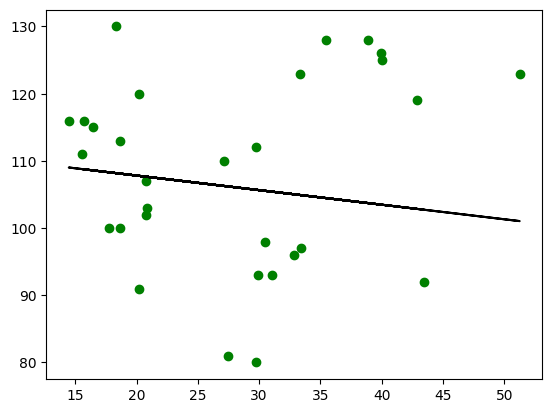

In [62]:
#Mostrar como a reta foi calculada

plt.scatter(X_test, Y_test, color='g')
plt.plot(X_test, y_pred, color='k')